# DATA PREPROCESSING USING NLP

## IMPORTING LIBRARIES

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/check1/submission (1).csv
/kaggle/input/harshcomments/train.csv
/kaggle/input/harshcomments/test.csv
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt


# Importing Data

In [2]:
tr_hate = pd.read_csv("../input/harshcomments/train.csv")
ts_hate = pd.read_csv("../input/harshcomments/test.csv")

In [3]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
#import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize
import csv

## ANALYSIS OF DATASET

In [4]:
tr_hate

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,a8be7c5d4527adbbf15f,""", 6 December 2007 (UTC)\nI am interested, not...",0,0,0,0,0,0
1,0b7ca73f388222aad64d,I added about three missing parameters to temp...,0,0,0,0,0,0
2,db934381501872ba6f38,SANDBOX?? \n\nI DID YOUR MADRE DID IN THE SANDBOX,1,0,0,0,0,0
3,228015c4a87c4b1f09a7,"why good sir? Why? \n\nYou, sir, obviously do ...",1,0,1,1,1,0
4,b18f26cfa1408b52e949,"""\n\n Source \n\nIncase I forget, or someone e...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
89354,748a13233c1ea91c4584,", this is becuase very few of his critics have...",0,0,0,0,0,0
89355,e49b832cc766ee220113,"""\nIf you're going to be technical, Boyd never...",0,0,0,0,0,0
89356,ff4751b348157ac2b585,"""\n\n Join us at FB \nHello Pakistanis Wikiped...",0,0,0,0,0,0
89357,94a3215b11a49ba57d61,Lockhart \n\nI updated some of the references ...,0,0,0,0,0,0


In [5]:
ts_hate

,id,text
0,e0ae9d9474a5689a5791,in an interview before his execution
1,b64a191301cad4f11287,He knew what he was doing. The below posts are...
2,5e1953d9ae04bdc66408,Zzzzzzz... youre a real bore. Now go bore some...
3,23128f98196c8e8f7b90,"""\n\nYet, it remains confusion because the 910..."
4,2d3f1254f71472bf2b78,I was referring to them losing interest in van...
...,...,...
38292,64ebe2494b078bc1ec18,Please refrain from removing content from Wiki...
38293,16259bc32bd803e6acf5,"17, 14 October 2015 (UTC) 08:"
38294,1fe631c9625d88a4d492,Listing the Girls in Alphabetical Order \n\nWh...
38295,085ab9387dce9d4e0b68,Dumb Fuck why did you delete the angry nintend...


In [6]:
tr_new=tr_hate.iloc[:,:]
tr_new

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,a8be7c5d4527adbbf15f,""", 6 December 2007 (UTC)\nI am interested, not...",0,0,0,0,0,0
1,0b7ca73f388222aad64d,I added about three missing parameters to temp...,0,0,0,0,0,0
2,db934381501872ba6f38,SANDBOX?? \n\nI DID YOUR MADRE DID IN THE SANDBOX,1,0,0,0,0,0
3,228015c4a87c4b1f09a7,"why good sir? Why? \n\nYou, sir, obviously do ...",1,0,1,1,1,0
4,b18f26cfa1408b52e949,"""\n\n Source \n\nIncase I forget, or someone e...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
89354,748a13233c1ea91c4584,", this is becuase very few of his critics have...",0,0,0,0,0,0
89355,e49b832cc766ee220113,"""\nIf you're going to be technical, Boyd never...",0,0,0,0,0,0
89356,ff4751b348157ac2b585,"""\n\n Join us at FB \nHello Pakistanis Wikiped...",0,0,0,0,0,0
89357,94a3215b11a49ba57d61,Lockhart \n\nI updated some of the references ...,0,0,0,0,0,0


In [7]:
#distributing the value
labels = tr_hate.iloc[:,2:8]
labels

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,1,1,1,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
89354,0,0,0,0,0,0
89355,0,0,0,0,0,0
89356,0,0,0,0,0,0
89357,0,0,0,0,0,0


In [8]:
#checking percentage of comments that are harsh 
tr_new.harsh.value_counts(normalize=True)

0    0.904218
1    0.095782
Name: harsh, dtype: float64

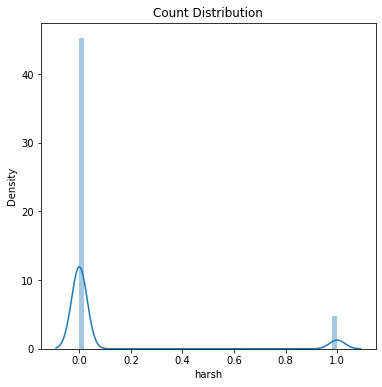

In [43]:
#Distribution of count
plt.figure(figsize=(6,6))
sns.distplot(tr_new.harsh)
plt.title('Count Distribution')
plt.show()

In [10]:
#checking percentage of comments that are extremely_harsh 
tr_new.extremely_harsh.value_counts(normalize=True)

0    0.989738
1    0.010262
Name: extremely_harsh, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


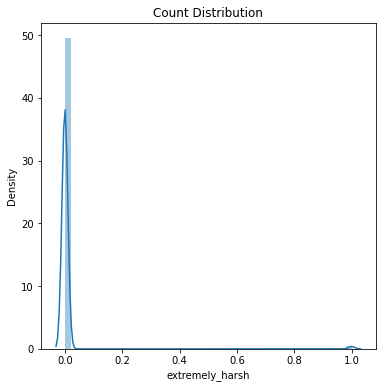

In [11]:
#Distribution of count
plt.figure(figsize=(6,6))
sns.distplot(tr_new.extremely_harsh)
plt.title('Count Distribution')
plt.show()

In [12]:
#checking percentage of comments that are vulgar 
tr_new.vulgar.value_counts(normalize=True)

0    0.946933
1    0.053067
Name: vulgar, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


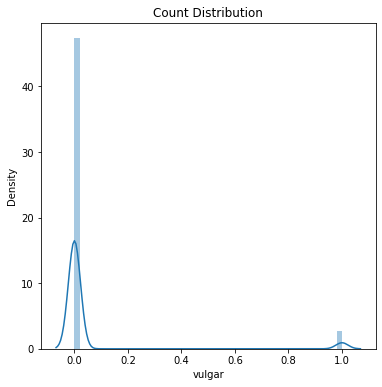

In [13]:
#Distribution of count
plt.figure(figsize=(6,6))
sns.distplot(tr_new.vulgar)
plt.title('Count Distribution')
plt.show()

In [14]:
#checking percentage of comments that are threatening 
tr_new.threatening.value_counts(normalize=True)

0    0.997001
1    0.002999
Name: threatening, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


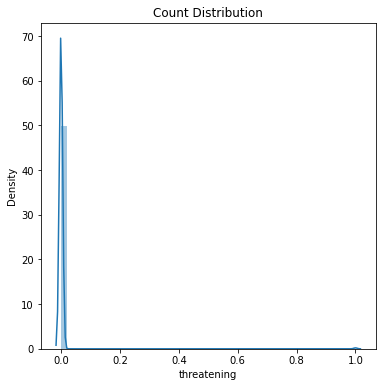

In [15]:
#Distribution of count
plt.figure(figsize=(6,6))
sns.distplot(tr_new.threatening)
plt.title('Count Distribution')
plt.show()

In [16]:
#checking percentage of comments that are disrespect 
tr_new.disrespect.value_counts(normalize=True)

0    0.95085
1    0.04915
Name: disrespect, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


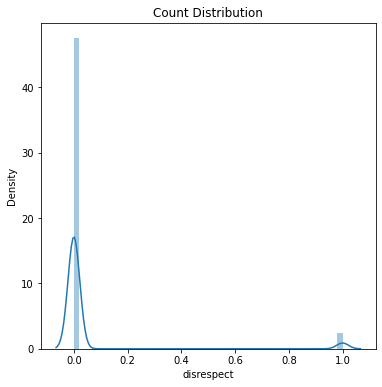

In [17]:
#Distribution of count for disrespect category
plt.figure(figsize=(6,6))
sns.distplot(tr_new.disrespect)
plt.title('Count Distribution')
plt.show()

In [18]:
#checking percentage of comments that are targeted_hate 
tr_new.targeted_hate.value_counts(normalize=True)

0    0.991025
1    0.008975
Name: targeted_hate, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


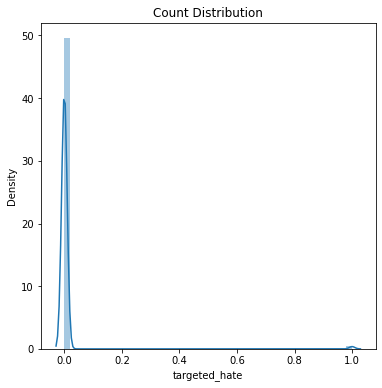

In [19]:
#Distribution of count
plt.figure(figsize=(6,6))
sns.distplot(tr_new.targeted_hate)
plt.title('Count Distribution')
plt.show()

<AxesSubplot:title={'center':'Correlation of features & targets'}>

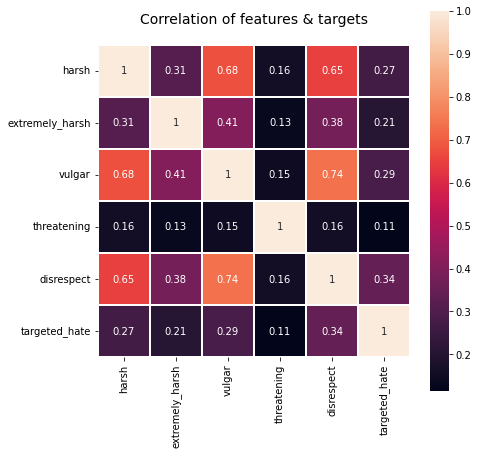

In [20]:
#plotting the heatmap may be for classifier chains
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(tr_new.iloc[:,2:8].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,linecolor='white',annot=True)

In [21]:
#categories we have in our data
categories = ['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate']

In [22]:
#checking the missing values
missing_values_check = tr_new.isnull().sum()
print(missing_values_check)

id                 0
text               0
harsh              0
extremely_harsh    0
vulgar             0
threatening        0
disrespect         0
targeted_hate      0
dtype: int64


In [23]:
#getting the counts for each labes
counts = []
for category in categories:
    counts.append((category, tr_new[category].sum()))
stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
stats

,category,number of comments
0,harsh,8559
1,extremely_harsh,917
2,vulgar,4742
3,threatening,268
4,disrespect,4392
5,targeted_hate,802


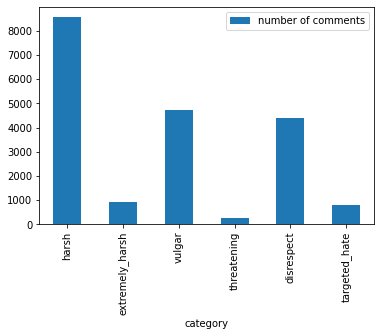

In [24]:
# bar plot
stats.plot(kind = 'bar',x = 'category',y = 'number of comments')
plt.show()

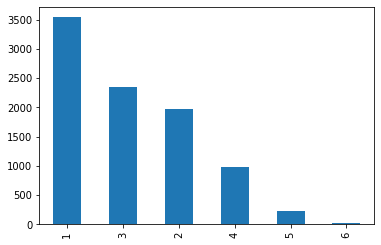

In [25]:
cnt=labels.sum(axis=1)
labelscounts = cnt.value_counts()
labelscounts = labelscounts.iloc[1:]
labelscounts.plot(kind = 'bar')
plt.show()

In [41]:
data_1 = tr_new[tr_new['harsh'] == 1 ]
data_harsh = tr_new[tr_new['harsh'] == 1 ].iloc[0:len(data_1),:]   

data_1 = tr_new[tr_new['extremely_harsh'] == 1 ]
data_extremely_harsh = tr_new[tr_new['extremely_harsh'] == 1 ].iloc[0:len(data_1),:]   

data_1 = tr_new[tr_new['vulgar'] == 1 ]
data_vulgar = tr_new[tr_new['vulgar'] == 1 ].iloc[0:len(data_1),:]  

data_1 = tr_new[tr_new['threatening'] == 1 ]
data_threatening = tr_new[tr_new['threatening'] == 1 ].iloc[0:len(data_1),:]   

data_1 = tr_new[tr_new['disrespect'] == 1 ]
data_disrespect = tr_new[tr_new['disrespect'] == 1 ].iloc[0:len(data_1),:]   

data_1 = tr_new[tr_new['targeted_hate'] == 1 ]
data_targeted_hate = tr_new[tr_new['targeted_hate'] == 1 ].iloc[0:len(data_1),:]  

## GETTING FEATURES (PREPROCESSING OF TEXT)

In [26]:
#file for nltk
import re
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [27]:
# Load stopwords, common words such as  "a," "the," "it," etc.
stop_words = stopwords.words('english')    
#it will take words and convert words to their "stem," e.g. Playing-> Play
#ps = PorterStemmer() 
collection = {
    "aren't" : "are not",
    "can't" : "cannot",
    "couldn't" : "could not",
    "didn't" : "did not",
    "doesn't" : "does not",
    "don't" : "do not",
    "hadn't" : "had not",
    "hasn't" : "has not",
    "haven't" : "have not",
    "he'd" : "he would",
    "he'll" : "he will",
    "he's" : "he is",
    "i'd" : "I would",
    "i'd" : "I had",
    "i'll" : "I will",
    "i'm" : "I am",
    "isn't" : "is not",
    "it's" : "it is",
    "it'll":"it will",
    "i've" : "I have",
    "let's" : "let us",
    "mightn't" : "might not",
    "mustn't" : "must not",
    "shan't" : "shall not",
    "she'd" : "she would",
    "she'll" : "she will",
    "she's" : "she is",
    "shouldn't" : "should not",
    "that's" : "that is",
    "there's" : "there is",
    "they'd" : "they would",
    "they'll" : "they will",
    "they're" : "they are",
    "they've" : "they have",
    "we'd" : "we would",
    "we're" : "we are",
    "weren't" : "were not",
    "we've" : "we have",
    "what'll" : "what will",
    "what're" : "what are",
    "what's" : "what is",
    "what've" : "what have",
    "where's" : "where is",
    "who'd" : "who would",
    "who'll" : "who will",
    "who're" : "who are",
    "who's" : "who is",
    "who've" : "who have",
    "won't" : "will not",
    "wouldn't" : "would not",
    "you'd" : "you would",
    "you'll" : "you will",
    "you're" : "you are",
    "you've" : "you have",
    "'re": " are",
    "wasn't": "was not",
    "we'll":" will",
    "didn't": "did not",
    "tryin'":"trying",
    ":')": " sad ",
    ":-(": " sad ",
    ":(": " sad ",
    ":s": " sad ",
    ":-s": " sad ",
    ":-(": " frown ",
    ":(": " frown ",
    ":s": " frown ",
    ":-s": " frown ",
    ":/": " bad ",
    ":&gt;": " sad ",
    ":')": " sad ",
    "&lt;3": " heart ",
    ":/": " worry ",
    ":&gt;": " angry ",
    "yay!": " good ",
    "yay": " good ",
    "yaay": " good ",
    "yaaay": " good ",
    "yaaaay": " good ",
    "yaaaaay": " good ",
    "m": "am",
    "r": "are",
    "u": "you",
    "haha": "ha",
    "hahaha": "ha",
    "don't": "do not",
    "haven't": "have not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "can't": "can not",
    "cannot": "can not",
    "i'm": "i am",
    "m": "am",
    "i'll" : "i will",
    "its" : "it is",
    "it's" : "it is",
    "'s" : " is",
    "that's" : "that is",
    "weren't" : "were not",
    "doesn't": "does not",
    "didn't": "did not",
    "hasn't": "has not",
    ":d": " smile ",
    ":p": " smile ",
    ":dd": " smile ",
    "8)": " smile ",
    ":-)": " smile ",
    ":)": " smile ",
    ";)": " smile ",
    "(-:": " smile ",
    "fuckkk" : "fuck",
    "(:": " smile ",
    r"\br\b": "are",
    r"\bu\b": "you",
    r"\bhaha\b": "ha",
    r"\bhahaha\b": "ha",
    r"\bdon't\b": "do not",
    r"\bdoesn't\b": "does not",
    r"\bdidn't\b": "did not",
    r"\bhasn't\b": "has not",
    r"\bhaven't\b": "have not",
    r"\bhadn't\b": "had not",
    r"\bwon't\b": "will not",
    r"\bwouldn't\b": "would not",
    r"\bcan't\b": "can not",
    r"\bcannot\b": "can not",
    r"\bi'm\b": "i am",
}

lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
stopWords = stopwords.words('english')
extraword = [word for word in collection.keys()] 
def clean_text(txt): 
    txt= word_tokenize(txt) #tokenize (split into list and remove whitespace)
    clean_text=""
    #txt=[collection[word] if word in collection else word for word in txt]
    for w in txt:
        if w[:4] == 'http' or w[:3] == 'www': # If we encounter some links in the comments section, 
            continue
        if w in extraword:
            w = collection[w]
        if w not in stop_words:
            stem=lemmatizer.lemmatize(w) #stem 
            clean_text += stem +" " 
    clean_text = re.sub('[^a-zA-Z ?!]+', '', clean_text)
    return clean_text

text_new=[] #declare a list to hold new movies

for cell in tr_new['text']:    
    txt= clean_text(cell)
    text_new.append(txt)
tr_new['text_new'] = text_new 

text_new=[]     
for cell in ts_hate['text']:    
    txt= clean_text(cell)
    text_new.append(txt)    
ts_hate['text_new'] = text_new  


In [27]:
# Load stopwords, common words such as  "a," "the," "it," etc.
stop_words = stopwords.words('english')    
#it will take words and convert words to their "stem," e.g. Playing-> Play
ps = PorterStemmer() 
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
stopWords = stopwords.words('english')
def clean_text(txt):  
    txt= re.sub("[^a-zA-Z ?!]+"," ",txt) #Remove everything except alphabetical characters 
    txt= word_tokenize(txt) #tokenize (split into list and remove whitespace)
    clean_text=""    
    for w in txt:      
        if w not in stop_words:
            #stem=lemmatizer.lemmatize(w) #stem 
            clean_text += w +" " 
    return clean_text

text_new=[] #declare a list to hold new movies

for cell in tr_new['text']:    
    txt= clean_text(cell)
    text_new.append(txt)
tr_new['text_new'] = text_new 

text_new=[]     
for cell in ts_hate['text']:    
    txt= clean_text(cell)
    text_new.append(txt)    
ts_hate['text_new'] = text_new  


In [28]:
print(lemmatizer.lemmatize('kites'))

kite


# Splitting the Train/Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(tr_new.text_new, labels, test_size=0.33, random_state=0)

In [35]:
train_text = X_train
test_text = X_test
complete_text = pd.concat([X_train, X_test]) 

In [32]:
train_text = tr_new.text_new
test_text = ts_hate.text_new
complete_text = pd.concat([train_text, test_text]) 

In [33]:
y_train

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
11973,0,0,0,0,0,0
64245,0,0,0,0,0,0
59154,0,0,0,0,0,0
60902,0,0,0,0,0,0
62271,0,0,0,0,0,0
...,...,...,...,...,...,...
21243,0,0,0,0,0,0
45891,0,0,0,0,0,0
42613,0,0,0,0,0,0
43567,0,0,0,0,0,0


# **Using TF-IDF**

In [30]:
import numpy as np
import pandas as pd
import regex as re
import pickle
import nltk
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Grid search for tfidf

In [35]:
for x in categories:
    print("processing",x)
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=stop_words)),
        ('clf', RidgeClassifier(alpha=25,fit_intercept=True, solver='sag', max_iter=200,random_state=0)),
    ])
    parameters = {
        'tfidf__min_df' :(2,5),
        'tfidf__max_df': (0.25, 0.5, 0.75),
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    }

    grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
    grid_search_tune.fit(X_train, y_train[x])

    print("Best parameters set:")
    print (grid_search_tune.best_estimator_.steps)
    print("Best: %f using %s" % (grid_search_tune.best_score_, grid_search_tune.best_params_))

# Vectorization

In [36]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,  
    strip_accents = 'unicode',                               
    analyzer = 'word',  
    lowercase = False,  
    stop_words = 'english',  
    ngram_range = (1, 1), 
    min_df = 5,
    max_df = 0.25,
    norm = 'l2',
    max_features = 30000
) #lowercase = true : convert all characters into lower case before tokenzing
word_vectorizer.fit(complete_text) # Apply tfidf fitting on the whole preprocessed text data so that we schieve a better fitted model.
trwfea = word_vectorizer.transform(train_text)
tewfea = word_vectorizer.transform(test_text)

char_vectorizer = TfidfVectorizer (
    sublinear_tf = True,
    strip_accents = 'unicode',
    analyzer = 'char',
    ngram_range = (2, 4), 
    min_df = 2, 
    max_df = 0.5,
    max_features = 20000
)
char_vectorizer.fit(complete_text) # We fit on complete training + test data so as to achieve a better fit.
trcfea = char_vectorizer.transform(train_text)
tecfea = char_vectorizer.transform(test_text)

In [39]:
# Horizontally merging the training and test features.

tr_fea = hstack([trcfea, trwfea])  
ts_fea = hstack([tecfea, tewfea])

In [38]:
train_features

<89359x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 38974343 stored elements in COOrdinate format>

# Using Word2Vec

In [39]:
import gensim
from gensim.models import Word2Vec

X_train_w = X_train.apply(lambda x: gensim.utils.simple_preprocess(x))
X_test_w = X_test.apply(lambda x: gensim.utils.simple_preprocess(x))
X_train.head()

11973    Arbitrary break make important point Let keep ...
64245    WikiProject History Science newsletter Issue I...
59154    My RFA year ago week The LOL Casliber one two ...
60902    Agreed What somebody pens response include als...
62271    I thinking readers mostly vandal wants disrupt...
Name: text_new, dtype: object

In [40]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
# Initialize and train the model (this will take some time)
w2v_model = Word2Vec(pd.concat([X_train_w, X_test_w]), workers=num_workers,
                     vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)

In [41]:
w2v_model.wv.most_similar('nigga')

[('twat', 0.814550518989563),
 ('cum', 0.8137764930725098),
 ('kick', 0.7954991459846497),
 ('pussy', 0.79521244764328),
 ('motherfucking', 0.7934619784355164),
 ('fuckin', 0.7922528982162476),
 ('delanoy', 0.7886987924575806),
 ('whore', 0.7860848903656006),
 ('wat', 0.7838656306266785),
 ('wanker', 0.781448245048523)]

In [42]:
def sent_vec(sent):
    vector_size = w2v_model.wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in w2v_model.wv:
            ctr += 1
            wv_res += w2v_model.wv[w]
            #print(wv_res)
    wv_res = wv_res/ctr
    return wv_res

In [43]:
w2v_model.wv.vector_size

300

In [44]:
token_tr = X_train_w.apply(sent_vec).to_list()
token_ts = X_test_w.apply(sent_vec).to_list()

# Using GloVe

In [46]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [47]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [48]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)

word_index = tokenizer.word_index

In [49]:
max(len(data) for data in X_train)

9486

In [50]:
sequences = tokenizer.texts_to_sequences(X_train)
padded_seq = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

In [51]:
sequences = tokenizer.texts_to_sequences(X_test)
padded_seq = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

In [52]:
padded_seq[0]

array([    1,  6822,  3975,     2,   278,   453,   314,   178, 10109,
          49,   104,    30,     2, 10109,     2,     4,  4368,  1669,
         756,    77,   858,     9,    79,  2973,     9,  2647,     5,
        4063,  1164,  2070,   152,  4368,  1669, 32119,    55,  1065,
         862,   363,     2,   120,   125,   929,   459,    40,    84,
          34,  4368,  1669,   756,     2,   335,     1,   365,   815,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [53]:
# create embedding index
embedding_index = {}
with open('../input/glove6b100dtxt/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [54]:
embedding_index['good']

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [56]:
from tqdm import tqdm
def sent2vec(s):
    words = str(s).lower()
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(X_train_w)]
xtest_glove = [sent2vec(x) for x in tqdm(X_test_w)]

100%|██████████| 29489/29489 [00:04<00:00, 5956.47it/s]


In [57]:
tr=np.array(xtrain_glove)

In [58]:
type(tr)

numpy.ndarray

In [59]:
ts=np.array(xtest_glove)

In [60]:
X_train

11973    Arbitrary break make important point Let keep ...
64245    WikiProject History Science newsletter Issue I...
59154    My RFA year ago week The LOL Casliber one two ...
60902    Agreed What somebody pens response include als...
62271    I thinking readers mostly vandal wants disrupt...
                               ...                        
21243    October UTC Yet another assumption I extremely...
45891      He playing quickly get bored without food IMHO 
42613    Ministry types souls responding call numbers c...
43567    I totally get saying perhaps Wikipedia better ...
68268    Awkward prose case putting label Difficult Ame...
Name: text_new, Length: 59870, dtype: object

## CREATING WORD CLOUD

In [61]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [62]:
#getting to know the toxic words
def wordcloud(df,categories):
    #print only rows where the toxic category label value is 1 (i.e the comment is toxic)
    for cat in categories:
        subset=df[df[cat]==1]
        text=subset.text.values
        wc=WordCloud(background_color="black",max_words=4000)

        wc.generate(" ".join(text))
        plt.figure(figsize=(20,20))
        plt.subplot(221)
        plt.axis("off")
        plt.title("Words frequenced in {}".format(cat), fontsize=20)
        plt.imshow(wc.recolor(colormap='gist_earth',random_state=244),alpha=0.98)

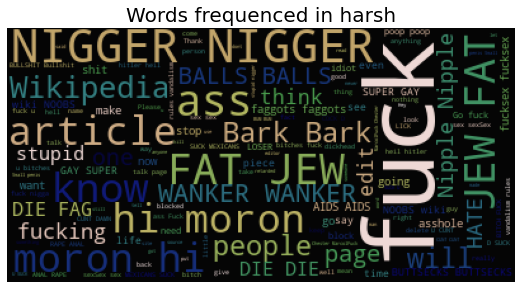

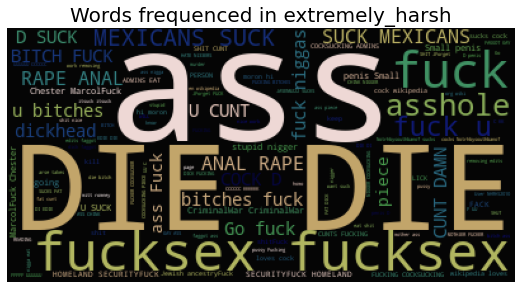

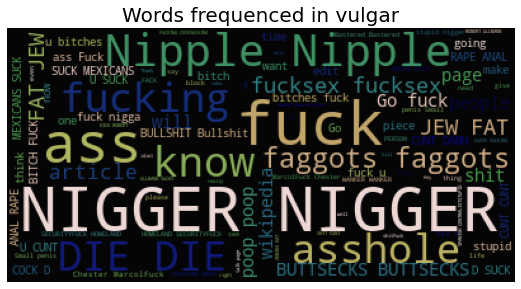

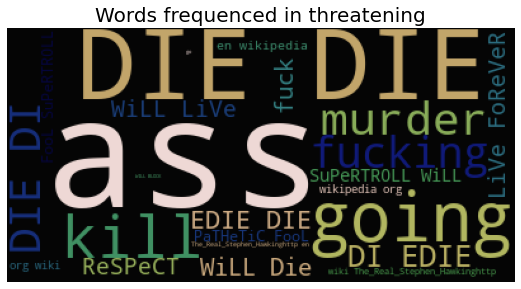

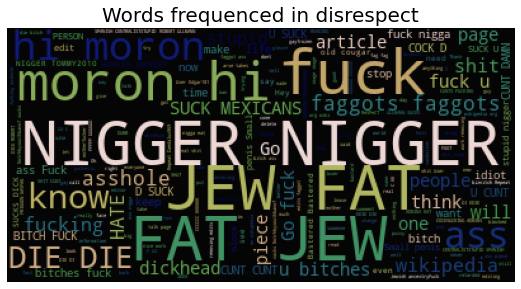

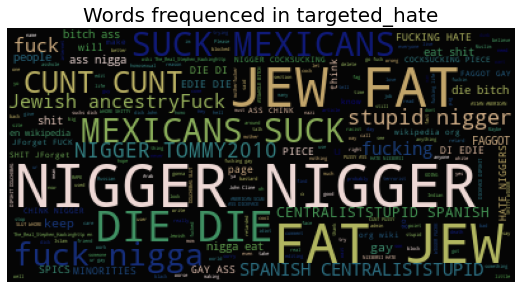

In [63]:
lst=wordcloud(tr_hate,categories)

In [64]:
tr_new.text_new.describe()

count        89359
unique       88857
top       Jun UTC 
freq            12
Name: text_new, dtype: object

<AxesSubplot:ylabel='Frequency'>

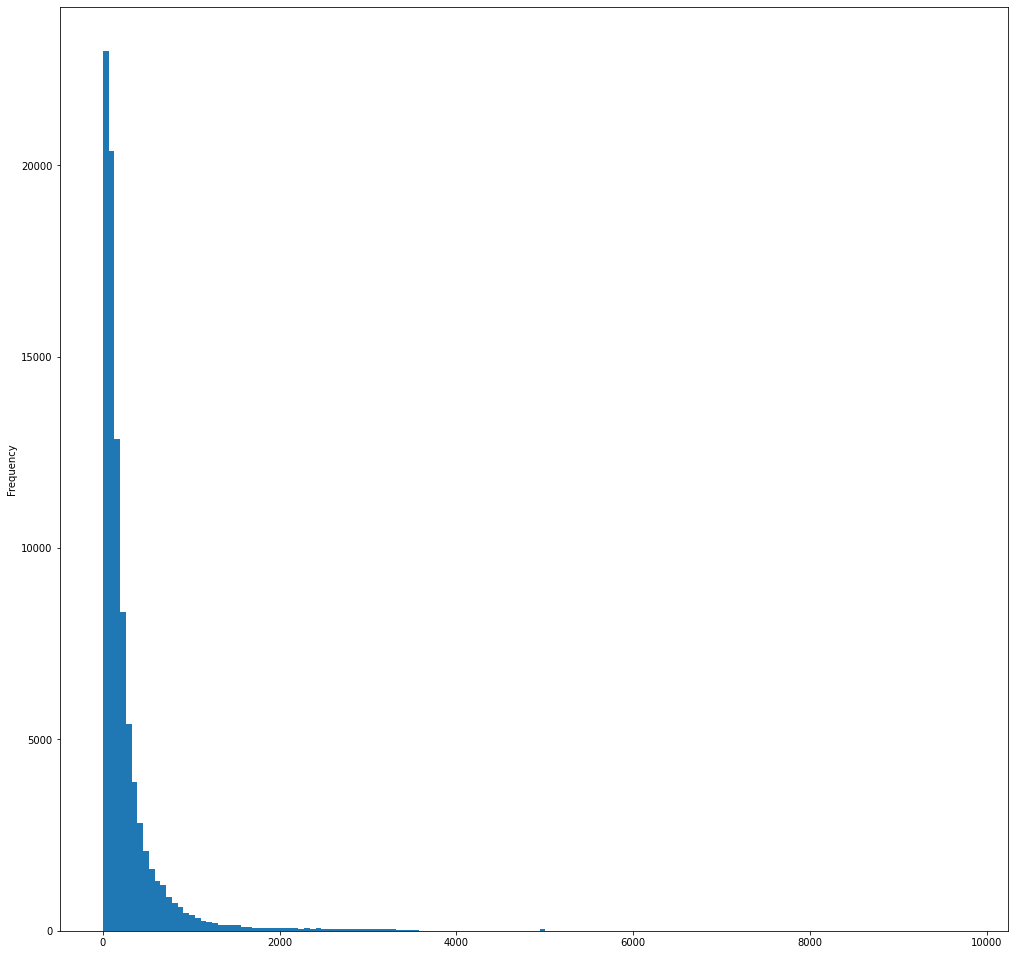

In [65]:
#word counts in cell
plt.figure(figsize=(17,17))
tr_new.text_new.apply(len).plot.hist(bins=150)

In [66]:
tr_new.text_new.apply(len).describe()

count    89359.000000
mean       263.580826
std        413.326076
min          0.000000
25%         64.000000
50%        136.000000
75%        287.000000
max       9755.000000
Name: text_new, dtype: float64

# **DATA MODELLING**

# Linear SVC Classifier 

In [45]:
# from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import roc_auc_score

# SVC_pipeline=CalibratedClassifierCV(LinearSVC(class_weight='balanced'))
# #data['id'] = ts_hate['id']
# for category in categories:
#     print('... Processing {}'.format(category))
#     SVC_pipeline.fit(tr_fea, y_train[category])
#     prediction=SVC_pipeline.predict(ts_fea)
#     #print(roc_auc_score(y_test[category],prediction))
#     print(classification_report(y_test[category], prediction))
#     print(confusion_matrix(y_test[category], prediction))

... Processing harsh
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26634
           1       0.88      0.68      0.77      2855

    accuracy                           0.96     29489
   macro avg       0.92      0.84      0.87     29489
weighted avg       0.96      0.96      0.96     29489

[[26369   265]
 [  910  1945]]
... Processing extremely_harsh


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29176
           1       0.55      0.22      0.32       313

    accuracy                           0.99     29489
   macro avg       0.77      0.61      0.66     29489
weighted avg       0.99      0.99      0.99     29489

[[29118    58]
 [  243    70]]
... Processing vulgar
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27907
           1       0.88      0.73      0.80      1582

    accuracy                           0.98     29489
   macro avg       0.93      0.86      0.89     29489
weighted avg       0.98      0.98      0.98     29489

[[27751   156]
 [  433  1149]]
... Processing threatening
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29395
           1       0.52      0.28      0.36        94

    accuracy                           1.00     29489
   macro avg     

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29211
           1       0.64      0.21      0.31       278

    accuracy                           0.99     29489
   macro avg       0.82      0.60      0.65     29489
weighted avg       0.99      0.99      0.99     29489

[[29179    32]
 [  221    57]]


In [71]:
train_features.shape

(89359, 50000)

# Ridge and logistic

# for test/train

In [40]:
# from sklearn import linear_model
# from sklearn.linear_model import RidgeClassifier
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.linear_model import RidgeClassifier
# overall_score = []
# for x in categories:
#         print('... Processing {}'.format(x))
#         class_column = y_train[x].values
#         score = 0
#         if x in ['targeted_hate', 'threatening']:
#             model = LogisticRegression(n_jobs=-1, random_state=0, C=3)
#             model.fit(tr_fea,y_train[x])
#             score = roc_auc_score(y_test[x],model.predict_proba(ts_fea)[:,1])
#         else:
#             rid =  RidgeClassifier(alpha=17,fit_intercept=True, solver='sag', max_iter=250,random_state=0,tol = 0.0005)
#             rid.fit(tr_fea,y_train[x])
#             d = rid.decision_function(ts_fea)
#             probs = np.exp(d) / np.sum(np.exp(d))
#             score = roc_auc_score(y_test[x],probs)
#         overall_score.append(score)
#         print(x,score)
# print("average score", sum(overall_score)/len(overall_score))

... Processing harsh
harsh 0.977939723095994
... Processing extremely_harsh
extremely_harsh 0.9845253352792922
... Processing vulgar
vulgar 0.9907925284798883
... Processing threatening
threatening 0.9842081262915607
... Processing disrespect
disrespect 0.9802833909292764
... Processing targeted_hate
targeted_hate 0.9795055400683048
average score 0.9828757740240528


# for uploading data

In [73]:
predict_dic = pd.DataFrame(columns=['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate'])
predict_dic

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate


In [74]:
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
predict_dic['id'] = ts_hate['id']
overall_score = []
for x in categories:
        print('... Processing {}'.format(x))
        class_column = labels[x].values
        score = 0
        if x in ['targeted_hate', 'threatening']:
            model = LogisticRegression(n_jobs=-1, random_state=0, C=3)
            model.fit(train_features,labels[x])
            predict_dic[x] = model.predict_proba(test_features)[:,1].tolist()
        else:
            rid =  RidgeClassifier(alpha=17,fit_intercept=True, solver='sag', max_iter=250,random_state=0,tol = 0.0005)
            rid.fit(train_features,labels[x])
            d = rid.decision_function(test_features)
            probs = np.exp(d) / np.sum(np.exp(d))
            predict_dic[x] = probs.tolist()

... Processing harsh
... Processing extremely_harsh
... Processing vulgar
... Processing threatening
... Processing disrespect
... Processing targeted_hate


In [75]:
predict_dic

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate,id
0,0.000022,0.000025,0.000021,0.001148,0.000022,0.001186,e0ae9d9474a5689a5791
1,0.000042,0.000026,0.000026,0.001526,0.000032,0.013920,b64a191301cad4f11287
2,0.000027,0.000025,0.000025,0.001081,0.000028,0.003730,5e1953d9ae04bdc66408
3,0.000017,0.000025,0.000021,0.000584,0.000021,0.000418,23128f98196c8e8f7b90
4,0.000021,0.000025,0.000022,0.000146,0.000023,0.000111,2d3f1254f71472bf2b78
...,...,...,...,...,...,...,...
38292,0.000017,0.000025,0.000021,0.000160,0.000021,0.000249,64ebe2494b078bc1ec18
38293,0.000019,0.000026,0.000021,0.000225,0.000022,0.000361,16259bc32bd803e6acf5
38294,0.000020,0.000025,0.000021,0.000372,0.000021,0.001115,1fe631c9625d88a4d492
38295,0.000123,0.000056,0.000161,0.003300,0.000131,0.034976,085ab9387dce9d4e0b68


In [ ]:
predict_dic.to_csv("submission3.csv", index=False)

# Ensembling using Voting Classifier

In [78]:
# from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import Pipeline
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.svm import SVC
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.metrics import classification_report


# lg_clf = LogisticRegression(C = 10, penalty='l2', solver = 'liblinear', random_state=100)
# svc_clf = CalibratedClassifierCV(LinearSVC(class_weight='balanced'))
# lgb_clf = LGBMClassifier(scale_pos_weight=9)


# voting_clf = VotingClassifier(estimators=[('lgb',lgb_clf),('svc',svc_clf),('lg',lg_clf)],voting='soft')
    
    
# for category in categories:
#     print('... Processing {}'.format(category))
#     voting_clf.fit(train_features, y_train[category])
#     # compute the testing accuracy
#     prediction = voting_clf.predict(test_features)
#     print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
#     print(classification_report(y_test[category], prediction))
#     print(confusion_matrix(y_test[category],prediction))

# **LSTM for checking**

In [92]:
#pip install tensorflow==2.8

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
import html
import unicodedata

import spacy
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
# from tensorflow.keras.utils import plot_model

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
X_test

13362    I joking renaming article Just wanted mention ...
73960    He signable league year began cut Seattle He U...
40749    I could opinions theories mother I go around p...
48170    While used Brighton Main Line SEML Chatham Mai...
52791    July Please stop edit warring Iron Dome Wikipe...
                               ...                        
35424    What Raj ? ? ? What Raj history History sectio...
38674    I idea talking talking Geber right ? life time...
86265                    Your behavier disgrace wikipedia 
52687    gon na Yeah ee yeah yeah ee Shake ! Yeah ee ye...
81311    de Moivre formula currently grossly incorrect ...
Name: text_new, Length: 29489, dtype: object

In [95]:
tr_new.text_new

0        December UTC I interested arguing policies res...
1        I added three missing parameters template info...
2         SANDBOX ? ? I DID YOUR MADRE DID IN THE SANDBOX 
3        good sir ? Why ? You sir obviously comprehend ...
4        Source Incase I forget someone else wants pick...
                               ...                        
89354                 becuase critics actually read books 
89355    If going technical Boyd never posted Googlegro...
89356    Join us FB Hello Pakistanis Wikipedians ! Assa...
89357    Lockhart I updated references Dennis Lockhart ...
89358    The whole section bad formatting needs written...
Name: text_new, Length: 89359, dtype: object

In [96]:
tok = Tokenizer(num_words=1000, oov_token='UNK')
tok.fit_on_texts(complete_text)
# Extract binary BoW features
x_train = tok.texts_to_sequences(tr_new.text_new)
x_test = tok.texts_to_sequences(ts_hate.text_new)

vocab_size = len(tok.word_index) + 1
vocab_size

148773

In [98]:
maxlen = np.mean([len(t) for t in x_train])
maxlen

38.83063821215546

In [99]:
training_padded = pad_sequences(x_train,
                                maxlen=50, 
                                truncating='post', 
                                padding='post'
                               )
test_padded = pad_sequences(x_test,
                            maxlen=50, 
                            truncating='post', 
                            padding='post'
                               )

In [100]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 128, input_length=50))
model.add(layers.LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))



model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=['accuracy'])

model.summary()

2022-12-10 12:28:49.108566: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           19042944  
_________________________________________________________________
lstm (LSTM)                  (None, 50, 512)           1312768   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 102       
Total params: 20,686,070
Trainable params: 20,686,070
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = model.fit(training_padded,
                     labels,
                    epochs=3,
                    batch_size=512,
                   validation_split=0.2)

Epoch 1/3


2022-12-10 12:28:49.959460: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


140/140 [==============================] - 693s 5s/step - loss: 0.1744 - accuracy: 0.9545 - val_loss: 0.1452 - val_accuracy: 0.9947
Epoch 2/3
140/140 [==============================] - 682s 5s/step - loss: 0.1424 - accuracy: 0.9941 - val_loss: 0.1429 - val_accuracy: 0.9947
Epoch 3/3
140/140 [==============================] - 681s 5s/step - loss: 0.1414 - accuracy: 0.9941 - val_loss: 0.1425 - val_accuracy: 0.9947


In [105]:
len(y_train)

59870

In [106]:
model.save('lstm_model.h5')

In [107]:
predict_dic = model.predict(test_padded, verbose=0)
predict_dic

array([[0.09208524, 0.01049462, 0.05227268, 0.0054906 , 0.04889032,
        0.00803027],
       [0.0920856 , 0.01049465, 0.05227277, 0.0054906 , 0.04889032,
        0.00803027],
       [0.09208518, 0.01049465, 0.05227271, 0.0054906 , 0.04889032,
        0.00803027],
       ...,
       [0.09208533, 0.01049465, 0.05227271, 0.00549051, 0.04889032,
        0.00803027],
       [0.09208521, 0.01049465, 0.0522728 , 0.0054906 , 0.04889038,
        0.00803033],
       [0.09208602, 0.01049465, 0.05227277, 0.00549054, 0.04889029,
        0.00803038]], dtype=float32)

In [108]:
df2 = pd.DataFrame(predict_dic, columns=['harsh', 'extremely_harsh', 'vulgar', 'threatening', 'disrespect', 'targeted_hate'])

In [46]:
print("Thanks")

Thanks
